# Important packages

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Data


In [ ]:
df = pd.read_csv(r'C:\Users\caglar\OneDrive\Dokumente\CT\ODTÜ\Education\MSc\Courses\CENG562\PROJECT\CENG562-Project\Data\MergedData.csv')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2710 entries, 0 to 2709
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_3                     2710 non-null   object 
 1   EventID                  2710 non-null   object 
 2   StationID                2710 non-null   object 
 3   Stream_3                 2710 non-null   float64
 4   Magnitude_3              2611 non-null   float64
 5   Country_3                2710 non-null   object 
 6   Depth_3                  2710 non-null   float64
 7   VS30_3                   1226 non-null   float64
 8   EpicentralDistance_3     2710 non-null   float64
 9   MainPGA_3                2710 non-null   float64
 10  MainPGV_3                2710 non-null   float64
 11  MainPGD_3                2710 non-null   float64
 12  MainMaxFrequency_3       2710 non-null   float64
 13  MainMaxDI_3              2710 non-null   float64
 14  MainMaxRI_3             

# To drop unnecessary columns 

In [34]:
df=df.drop(columns=['ID_3','Magnitude_3','Magnitude_4','EventID','StationID','Stream_3','Depth_3','EpicentralDistance_3', 'MainPGA_3','MainPGV_3','MainPGD_3', 'MainMaxFrequency_3','MainMaxDI_3','MainMaxRI_3','MainMaxMMI_3','MainHousnerIntensity_3', 'Country_3', 'ID_4','Stream_4','VS30_4','Depth_4','EpicentralDistance_4', 'MainPGV_4','MainPGD_4', 'MainMaxFrequency_4','MainMaxDI_4','MainMaxRI_4','MainMaxMMI_4','MainHousnerIntensity_4', 'Country_4', 'MainMaxDI','MainMaxRI','MainMaxMMI'])

In [35]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 VS30_3                     1484
HVSR_3                       11
TrainPGA_3                  368
TrainPGV_3                  368
TrainPGD_3                  368
TrainMaxFrequency_3         368
TrainMaxDI_3                368
TrainMaxRI_3                368
TrainMaxMMI_3               368
TrainHousnerIntensity_3     368
MainPGA_4                     0
HVSR_4                       11
TrainPGA_4                  206
TrainPGV_4                  206
TrainPGD_4                  206
TrainMaxFrequency_4         206
TrainMaxDI_4                206
TrainMaxRI_4                206
TrainMaxMMI_4               206
TrainHousnerIntensity_4     206
TrainMaxDI                  384
TrainMaxRI                  384
TrainMaxMMI                 384
dtype: int64


In [36]:
#df.fillna(df.select_dtypes(include='number').mean(), inplace=True)
df.dropna(inplace=True)

In [37]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 VS30_3                     0
HVSR_3                     0
TrainPGA_3                 0
TrainPGV_3                 0
TrainPGD_3                 0
TrainMaxFrequency_3        0
TrainMaxDI_3               0
TrainMaxRI_3               0
TrainMaxMMI_3              0
TrainHousnerIntensity_3    0
MainPGA_4                  0
HVSR_4                     0
TrainPGA_4                 0
TrainPGV_4                 0
TrainPGD_4                 0
TrainMaxFrequency_4        0
TrainMaxDI_4               0
TrainMaxRI_4               0
TrainMaxMMI_4              0
TrainHousnerIntensity_4    0
TrainMaxDI                 0
TrainMaxRI                 0
TrainMaxMMI                0
dtype: int64


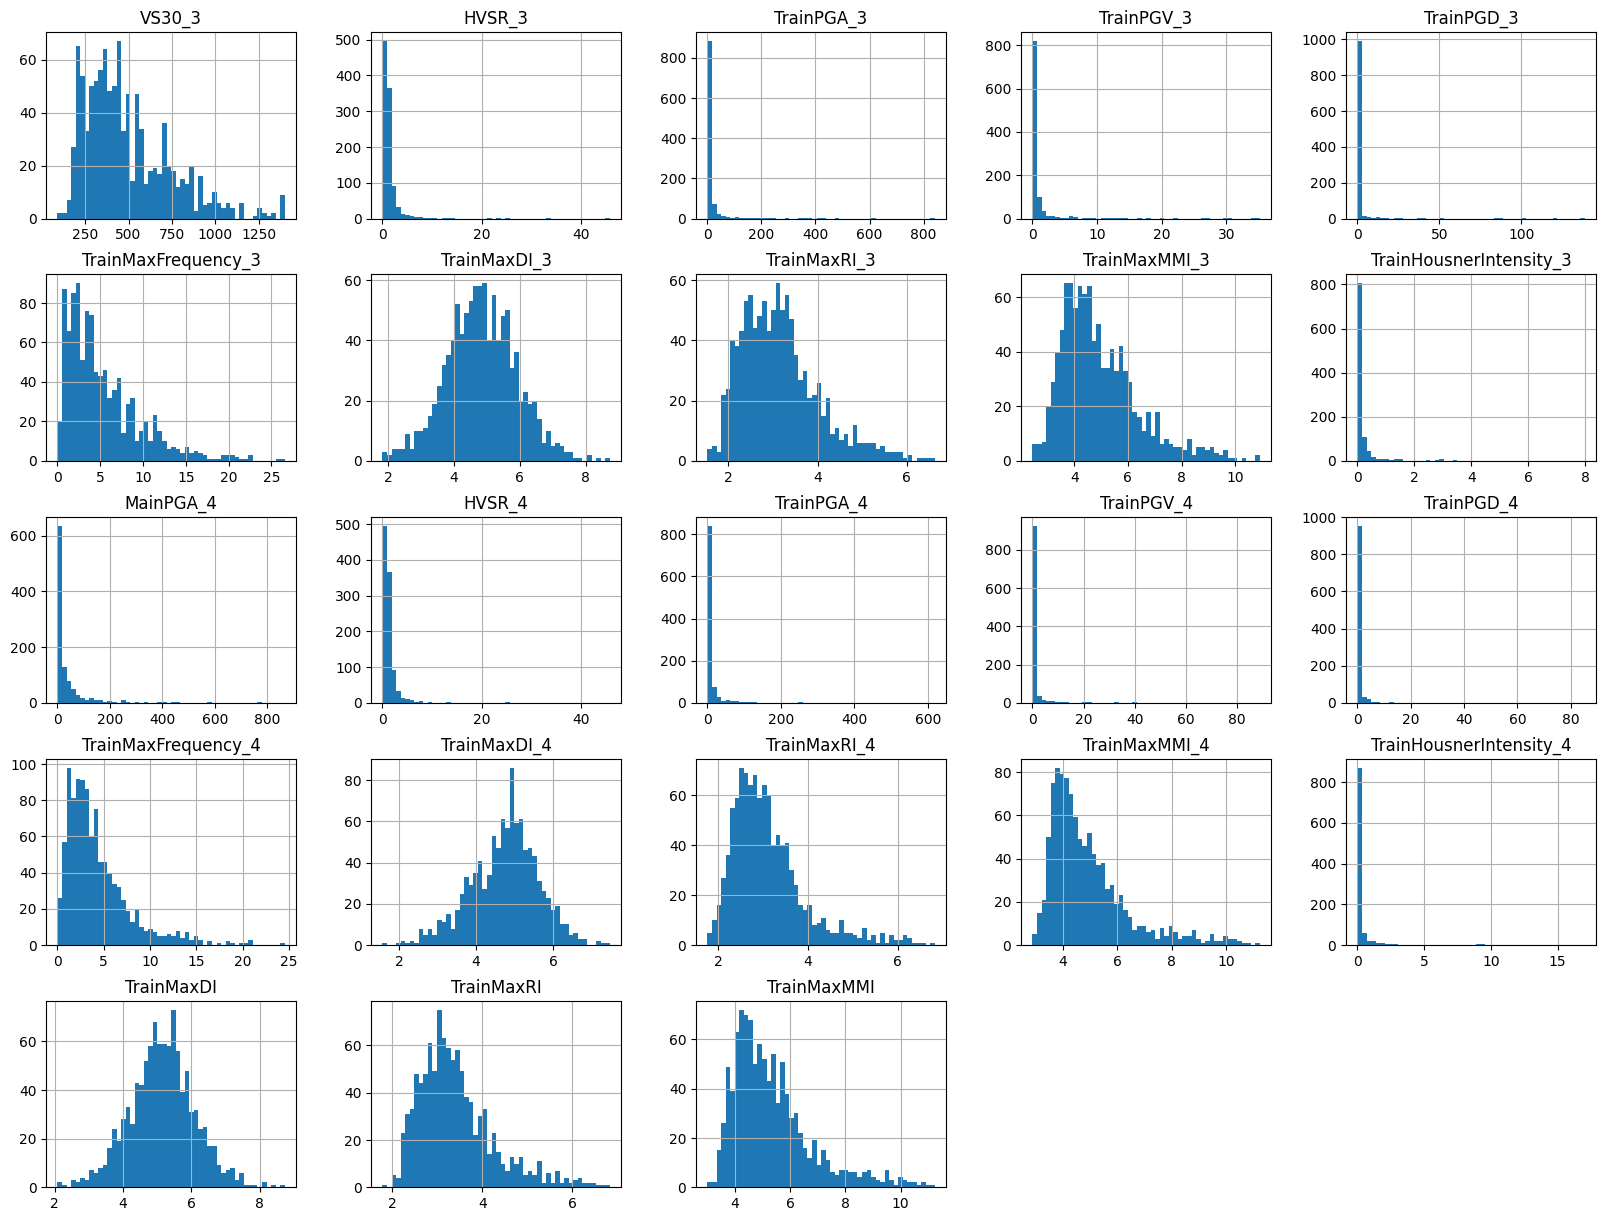

In [38]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

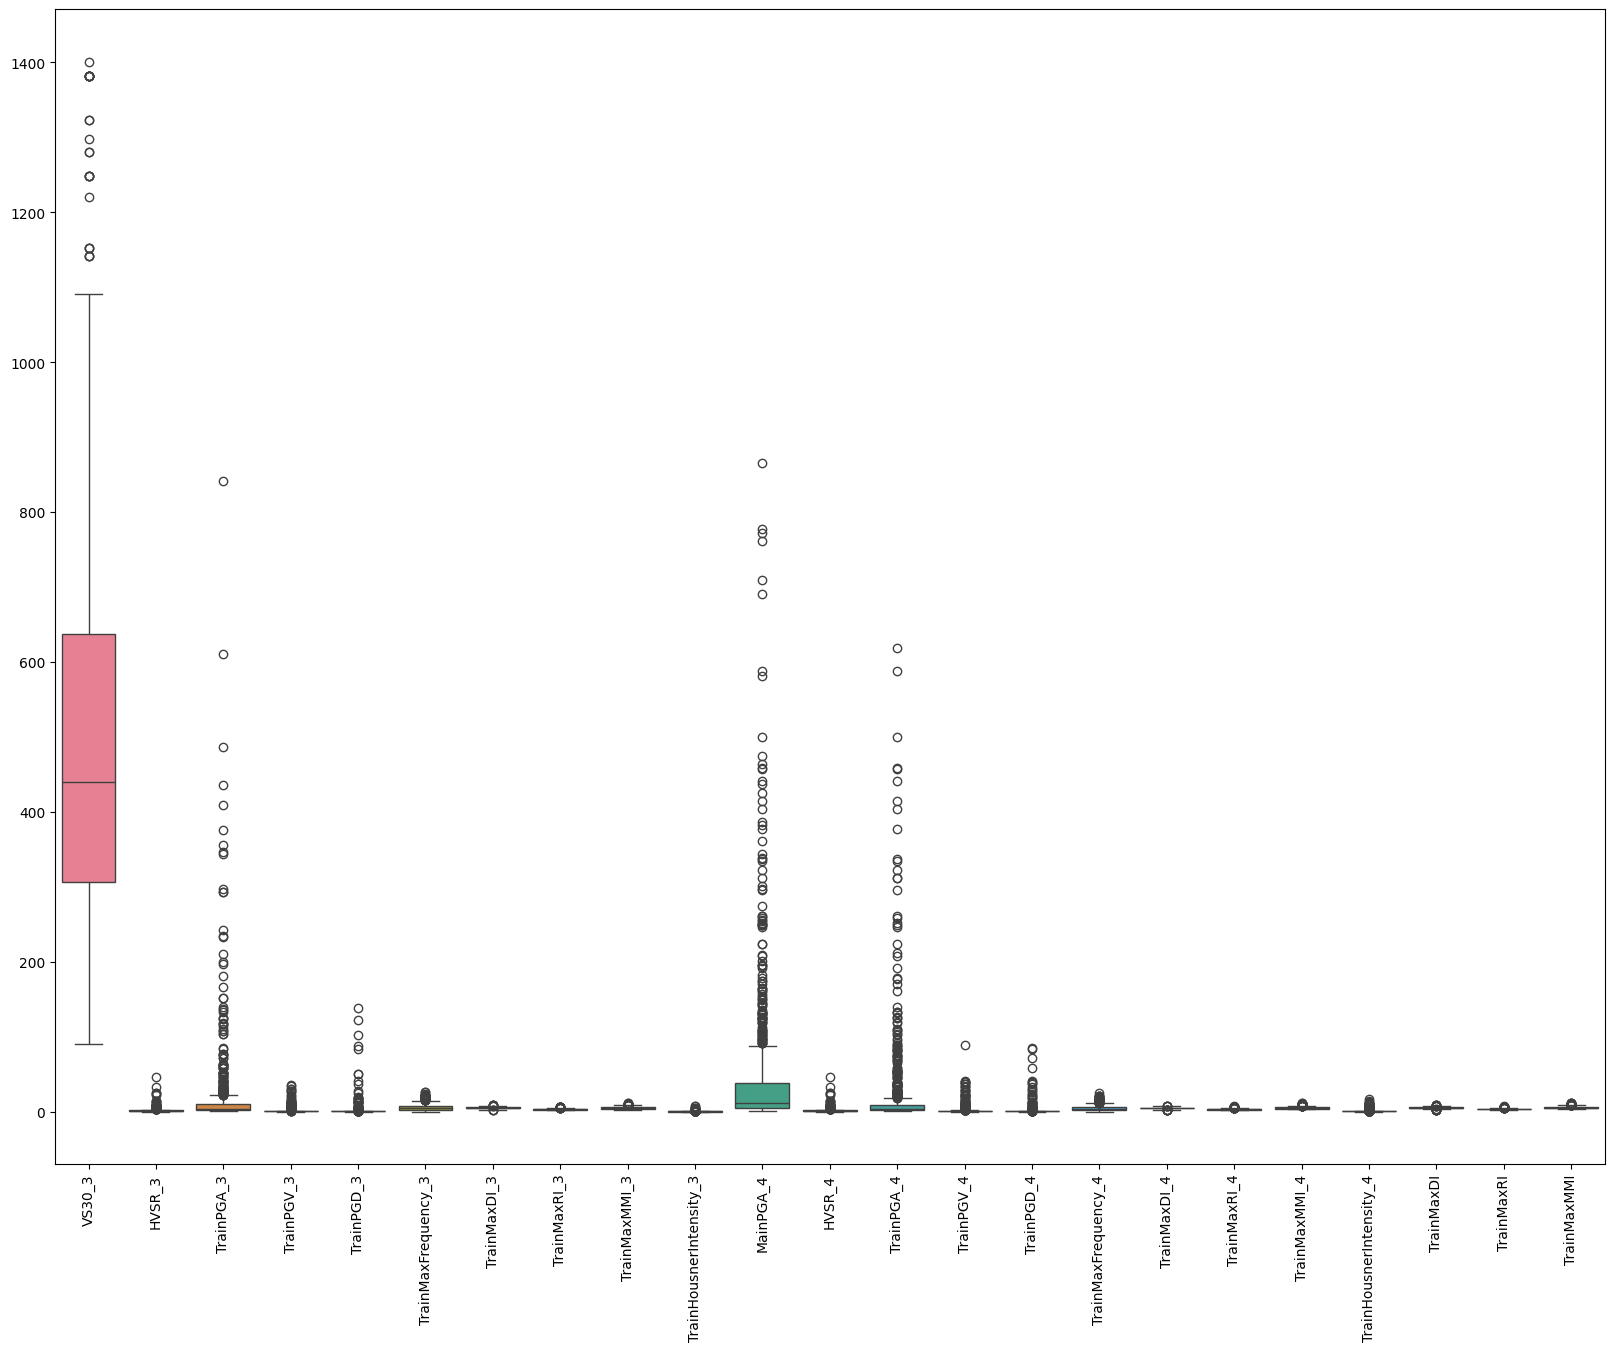

In [ ]:
# Boxplots
plt.figure(figsize=(20, 15))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [40]:
# Z-skorunu hesaplama
df['z_score'] = (df['MainPGA_4'] - df['MainPGA_4'].mean()) / df['MainPGA_4'].std()

# Outlier'ları kaldırma
df = df[df['z_score'].abs() < 3]

# Sonuç
print(df)

      VS30_3    HVSR_3  TrainPGA_3  TrainPGV_3  TrainPGD_3  \
2      292.0  1.248964    1.710752    0.118697    0.094250   
6      319.0  1.181245    2.846999    0.279356    0.386993   
8      273.0  0.323202    2.865262    0.236482    0.161834   
10     407.0  2.024777    1.811508    0.124280    0.189069   
11     223.0  0.838886    1.766510    0.095840    0.137508   
...      ...       ...         ...         ...         ...   
2682   489.0  0.712253    5.705758    0.307593    0.116671   
2687   340.0  0.767810    1.295774    0.046763    0.089075   
2690   237.0  0.450583    5.266515    0.310020    0.444988   
2691   204.0  0.451439   14.746247    0.558676    0.146498   
2694  1280.0  1.233749    1.036282    0.264108    0.157089   

      TrainMaxFrequency_3  TrainMaxDI_3  TrainMaxRI_3  TrainMaxMMI_3  \
2                2.195609      5.582638      3.182638       4.501288   
6                1.397206      5.539223      3.139223       4.433065   
8                4.391218      5.141682

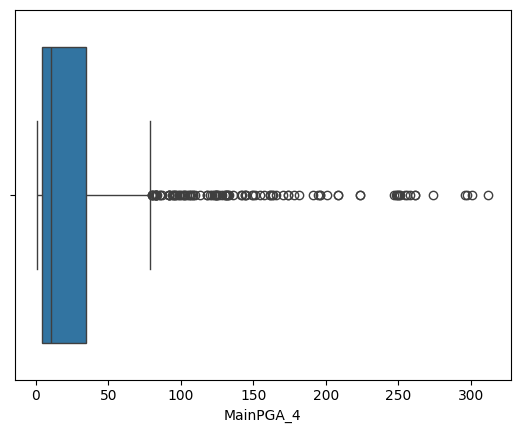

In [41]:
sns.boxplot(x = df["MainPGA_4"]);

In [ ]:
# Defining x and y
X = df.drop('MainPGA_4', axis=1)
y = df['MainPGA_4']

# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: xlabel='MainPGA_4', ylabel='Count'>

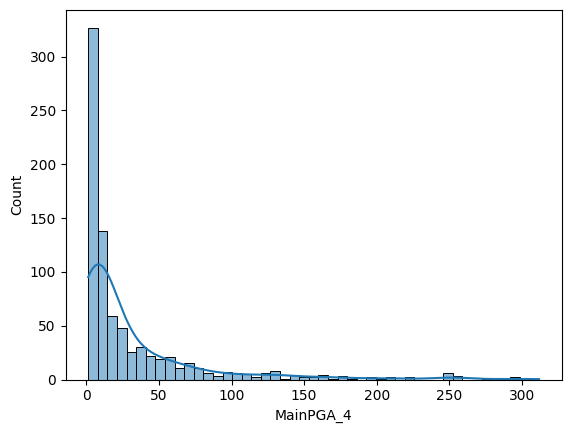

In [43]:
sns.histplot(y_train, kde=True)


# Models


In [44]:
param_grids = {
    "GradientBoosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9],
        'min_child_weight': [1, 5, 10],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    },
    "AdaBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'loss': ['linear', 'square']
    },
    "CatBoost": {
        'iterations': [100, 200],  
        'depth': [4, 6, 8],  
        'learning_rate': [0.01, 0.05], 
        'l2_leaf_reg': [3, 5], 
        'border_count': [32, 50],
        'bagging_temperature': [0.0, 0.5]  
    },
    "LightGBM": {
        'num_leaves': [15, 31],  
        'learning_rate': [0.05],  
        'n_estimators': [50], 
        'max_depth': [3, 5],  
        'min_child_samples': [50],
        'subsample': [0.8], 
        'colsample_bytree': [0.8],  
        'max_bin': [63],  
        'lambda_l1': [0],  
        'lambda_l2': [0]   
    },

    "RandomForest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
}

In [ ]:
# Initialize models
models = {
    "GradientBoosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0),
    "LightGBM": LGBMRegressor(),
    "RandomForest": RandomForestRegressor()
}

# Grid search for each model
best_models = {}
results = []
for name, model in models.items():
    print(f"Running GridSearch for {name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], 
                               scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    
    # Evaluate best model on test data
    y_test_pred = best_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
    # Evaluate best model on train data
    y_train_pred = best_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    
    results.append({
        "Model": name,
        "Best Parameters": grid_search.best_params_,
        "Train R2": train_r2,
        "Test R2": test_r2,
        "Train MSE": train_mse,
        "Test MSE": test_mse,
        "Train RMSE": train_rmse,
        "Test RMSE": test_rmse,
        "Train MAE": train_mae,
        "Test MAE": test_mae,
        "Train MAPE": train_mape,
        "Test MAPE": test_mape,
    })

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save the results to a CSV file
results_df.to_csv('model_results_with_train_test_comparison.csv', index=False)


Running GridSearch for GradientBoosting...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits


# Results

In [ ]:
results_df

In [21]:
results_df = results_df.round(4)
results_df.to_csv("Results")

In [ ]:
fig, ax = plt.subplots(figsize=(11, 5))

sns.lineplot(x=range(len(y_test)), y=y_test, ax=ax, label='Actual Data', color='black')
for name in best_models.keys():
    sns.lineplot(x=range(len(y_test)), y=best_models[name].predict(X_test), ax=ax, label=name)

ax.set_xlabel('Sample Index')
ax.set_ylabel('MainPGA_4')
ax.legend()
plt.show()

In [ ]:
# Tahmin edilen MainPGA değerlerini eklemek
X_test_with_predictions = X_test.copy()
for name, model in best_models.items():
    X_test_with_predictions[f'{name}_Predict'] = model.predict(X_test)

# Gerçek MainPGA değerlerini eklemek
X_test_with_predictions['MainPGA_4'] = y_test.values

# Sonuçları bir CSV dosyasına kaydetmek
X_test_with_predictions.to_csv('PredictionsandRealDataPGA.csv', index=False)

In [ ]:
X_test_with_predictions[['MainPGA_4','GradientBoosting_Predict','XGBoost_Predict','AdaBoost_Predict','CatBoost_Predict','LightGBM_Predict','RandomForest_Predict']].head(20)

In [ ]:
results_data = pd.read_csv('model_results_with_train_test_comparison.csv')

results_df = pd.DataFrame(results_data)

# Plot the results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.barplot(x='Model', y='Test R2', data=results_df, ax=axes[0, 0])
axes[0, 0].set_title('R2 Score Comparison')
axes[0, 0].set_ylabel('Test R2 Score')

sns.barplot(x='Model', y='Test RMSE', data=results_df, ax=axes[0, 1])
axes[0, 1].set_title('RMSE Comparison')
axes[0, 1].set_ylabel('Test Root Mean Squared Error')


sns.barplot(x='Model', y='Train R2', data=results_df, ax=axes[1, 0])
axes[0, 0].set_title('R2 Score Comparison')
axes[0, 0].set_ylabel('R2 Score')

sns.barplot(x='Model', y='Train RMSE', data=results_df, ax=axes[1, 1])
axes[0, 1].set_title('RMSE Comparison')
axes[0, 1].set_ylabel('Root Mean Squared Error')


plt.tight_layout()
plt.show()